# JF Working 2 -  DO NOT RUN FROM THE TOP

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

df = pd.read_csv('working_df.csv', index_col=0)

In [2]:
df

,funder,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,...,source_class,waterpoint_type,waterpoint_type_group,status_group,date_recorded,gps_height,longitude,latitude,population,construction_year
0,33.0,87.0,NaN,6,1877.0,0,0,4.0,35,531,...,0.0,0.0,0.0,0,2011,1390,34.938093,-9.856322,109.0,1999.0
1,133.0,160.0,1.0,1,2382.0,14,14,1.0,20,131,...,1.0,0.0,0.0,0,2013,1399,34.698766,-2.147466,280.0,2010.0
2,450.0,15.0,1374.0,0,0.0,18,17,3.0,79,1497,...,1.0,2.0,0.0,0,2013,686,37.460664,-3.821329,250.0,2009.0
3,7.0,32.0,29483.0,7,253.0,17,20,14.0,108,634,...,0.0,2.0,0.0,1,2013,263,38.486161,-11.155298,58.0,1986.0
4,1057.0,58.0,0.0,1,8810.0,6,5,0.0,17,1373,...,1.0,0.0,0.0,0,2011,0,31.130847,-1.825359,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,13.0,9.0,33426.0,0,3259.0,2,2,4.0,31,31,...,0.0,0.0,0.0,0,2013,1210,37.169807,-3.253847,125.0,1999.0
59396,248.0,303.0,7490.0,2,345.0,0,0,3.0,0,271,...,1.0,0.0,0.0,0,2011,1212,35.249991,-9.070629,56.0,1996.0
59397,NaN,NaN,142.0,2,6611.0,1,1,6.0,30,70,...,0.0,1.0,1.0,0,2011,0,34.017087,-8.750434,NaN,NaN
59398,710.0,573.0,23415.0,2,159.0,12,11,3.0,71,852,...,0.0,1.0,1.0,0,2011,0,35.861315,-6.378573,NaN,NaN


In [4]:
df['date_recorded'].value_counts()

2011    28108
2013    23481
2012     5968
2004       30
2002        1
Name: date_recorded, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funder                 53189 non-null  float64
 1   installer              53174 non-null  float64
 2   wpt_name               54096 non-null  float64
 3   basin                  57588 non-null  int64  
 4   subvillage             57217 non-null  float64
 5   region                 57588 non-null  int64  
 6   region_code            57588 non-null  int64  
 7   district_code          57565 non-null  float64
 8   lga                    57588 non-null  int64  
 9   ward                   57588 non-null  int64  
 10  public_meeting         54612 non-null  float64
 11  scheme_management      53838 non-null  float64
 12  permit                 54532 non-null  float64
 13  extraction_type_class  51428 non-null  float64
 14  management             56197 non-null  float64
 15  ma

# Train/Test Split

In [4]:
X = df.drop('status_group', axis=1)
y = df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.3)

# Imputing X_train & X_test

In [5]:
from missingpy import MissForest

/Users/jf/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
imputer = MissForest(random_state=33, max_depth=1)

In [7]:
X_train_i = imputer.fit(X_train, cat_vars=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
                                                 21, 22, 23, 24])
X_train_i = imputer.transform(X_train)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [8]:
X_test_i = imputer.transform(X_test)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [9]:
X_train_i

array([[ 1.60000000e+01,  1.59000000e+02,  1.09140000e+04, ...,
        -6.15354545e+00,  3.30952508e+02,  1.99838723e+03],
       [ 1.20000000e+01,  2.00000000e+00,  2.25610000e+04, ...,
        -3.32680957e+00,  5.30000000e+02,  1.99300000e+03],
       [ 1.20000000e+01,  5.00000000e+01,  4.26600000e+03, ...,
        -7.86341656e+00,  7.50000000e+02,  1.98400000e+03],
       ...,
       [ 3.95000000e+02,  2.00000000e+00,  2.68500000e+04, ...,
        -6.91777588e+00,  1.00000000e+00,  1.98500000e+03],
       [ 1.00000000e+00,  4.00000000e+00,  2.82380000e+04, ...,
        -1.04632738e+01,  2.50000000e+02,  1.98200000e+03],
       [ 3.10000000e+01,  5.40000000e+01,  1.89830000e+04, ...,
        -7.07305211e+00,  6.70000000e+02,  2.00800000e+03]])

In [11]:
X_train_i_df = pd.DataFrame(X_train_i)
X_train_i_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,16.0,159.0,10914.0,5.0,25.0,12.0,11.0,4.0,68.0,331.0,...,2.0,0.0,2.0,0.0,2011.0,0.0,35.891855,-6.153545,330.952508,1998.387233
1,12.0,2.0,22561.0,4.0,16380.0,7.0,7.0,0.0,12.0,66.0,...,0.0,0.0,0.0,0.0,2013.0,1260.0,30.914468,-3.326810,530.000000,1993.000000
2,12.0,50.0,4266.0,8.0,8951.0,16.0,15.0,3.0,103.0,1003.0,...,3.0,1.0,0.0,0.0,2013.0,2137.0,31.631254,-7.863417,750.000000,1984.000000
3,1.0,4.0,7719.0,6.0,16557.0,8.0,8.0,2.0,18.0,421.0,...,0.0,0.0,0.0,0.0,2013.0,462.0,34.831606,-11.319762,96.000000,1992.000000
4,0.0,0.0,26690.0,2.0,6903.0,3.0,3.0,3.0,27.0,473.0,...,1.0,0.0,1.0,1.0,2011.0,295.0,36.624641,-8.410004,400.000000,1976.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40306,1198.0,0.0,14653.0,0.0,157.0,10.0,9.0,4.0,80.0,819.0,...,2.0,0.0,0.0,0.0,2011.0,52.0,38.973581,-5.375739,12.000000,1995.000000
40307,28.0,59.0,2.0,0.0,8.0,2.0,2.0,2.0,11.0,518.0,...,3.0,1.0,0.0,0.0,2013.0,500.0,38.078320,-4.480761,140.000000,2013.000000
40308,395.0,2.0,26850.0,5.0,2428.0,3.0,3.0,5.0,25.0,539.0,...,3.0,1.0,0.0,0.0,2011.0,520.0,37.560400,-6.917776,1.000000,1985.000000
40309,1.0,4.0,28238.0,2.0,210.0,8.0,8.0,4.0,21.0,673.0,...,3.0,1.0,2.0,0.0,2013.0,844.0,36.122400,-10.463274,250.000000,1982.000000


In [13]:
X_train_i_df.to_csv('X_train_imputed.csv')

In [10]:
X_test_i

array([[ 0.00000000e+00,  0.00000000e+00,  3.04180000e+04, ...,
        -9.21695653e+00,  3.29925974e+02,  1.99124328e+03],
       [ 1.08000000e+02,  0.00000000e+00,  3.65690000e+04, ...,
        -8.65466047e+00,  2.80000000e+02,  2.00600000e+03],
       [ 4.50000000e+01,  3.40000000e+01,  9.33200000e+03, ...,
        -3.26856927e+00,  1.00000000e+00,  2.01200000e+03],
       ...,
       [ 6.30000000e+01,  5.06000000e+02,  1.00000000e+00, ...,
        -6.30199514e+00,  1.00000000e+00,  2.00900000e+03],
       [ 8.00000000e+00,  1.10000000e+01,  1.65920000e+04, ...,
        -3.70154623e+00,  6.70000000e+01,  2.01300000e+03],
       [ 3.77000000e+02,  3.84000000e+02,  2.03000000e+02, ...,
        -5.22129364e+00,  3.60000000e+02,  2.00500000e+03]])

In [12]:
X_test_i_df = pd.DataFrame(X_test_i)
X_test_i_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,30418.0,6.0,386.0,1.0,1.0,3.0,3.0,120.0,...,0.0,0.0,0.0,0.0,2011.0,0.0,33.624613,-9.216957,329.925974,1991.243283
1,108.0,0.0,36569.0,2.0,3509.0,3.0,3.0,3.0,27.0,19.0,...,3.0,1.0,0.0,0.0,2011.0,331.0,36.414944,-8.654660,280.000000,2006.000000
2,45.0,34.0,9332.0,0.0,2590.0,2.0,2.0,0.0,32.0,492.0,...,0.0,0.0,0.0,0.0,2013.0,1012.0,37.664298,-3.268569,1.000000,2012.000000
3,49.0,85.0,25520.0,4.0,1318.0,7.0,7.0,1.0,5.0,87.0,...,1.0,0.0,1.0,1.0,2013.0,1731.0,29.783005,-4.439251,450.000000,1995.000000
4,18.0,0.0,57.0,1.0,10878.0,4.0,4.0,1.0,16.0,376.0,...,1.0,0.0,1.0,1.0,2012.0,0.0,33.586406,-3.040369,408.622687,1998.090157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17272,1.0,0.0,21782.0,6.0,86.0,8.0,8.0,1.0,23.0,384.0,...,1.0,0.0,1.0,1.0,2013.0,981.0,35.662256,-10.363942,800.000000,1990.000000
17273,689.0,2037.0,17723.0,2.0,1730.0,3.0,3.0,0.0,4.0,95.0,...,3.0,1.0,0.0,0.0,2011.0,310.0,36.994441,-7.595949,150.000000,2008.000000
17274,63.0,506.0,1.0,5.0,2572.0,3.0,3.0,5.0,25.0,25.0,...,2.0,0.0,0.0,0.0,2011.0,394.0,37.442462,-6.301995,1.000000,2009.000000
17275,8.0,11.0,16592.0,0.0,3389.0,2.0,2.0,1.0,43.0,59.0,...,0.0,0.0,0.0,0.0,2013.0,917.0,37.597108,-3.701546,67.000000,2013.000000


In [14]:
X_test_i_df.to_csv('X_test_imputed.csv')

# START HERE

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

df = pd.read_csv('working_df.csv', index_col=0)

# Train/Test Split

In [2]:
X = df.drop('status_group', axis=1)
y = df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.3)

### Read in inputed X train and test

In [3]:
X_train_i = pd.read_csv('X_train_imputed.csv', index_col=0)
X_test_i = pd.read_csv('X_test_imputed.csv', index_col=0)

In [4]:
X_test_i

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,30418.0,6.0,386.0,1.0,1.0,3.0,3.0,120.0,...,0.0,0.0,0.0,0.0,2011.0,0.0,33.624613,-9.216957,329.925974,1991.243283
1,108.0,0.0,36569.0,2.0,3509.0,3.0,3.0,3.0,27.0,19.0,...,3.0,1.0,0.0,0.0,2011.0,331.0,36.414944,-8.654660,280.000000,2006.000000
2,45.0,34.0,9332.0,0.0,2590.0,2.0,2.0,0.0,32.0,492.0,...,0.0,0.0,0.0,0.0,2013.0,1012.0,37.664298,-3.268569,1.000000,2012.000000
3,49.0,85.0,25520.0,4.0,1318.0,7.0,7.0,1.0,5.0,87.0,...,1.0,0.0,1.0,1.0,2013.0,1731.0,29.783005,-4.439251,450.000000,1995.000000
4,18.0,0.0,57.0,1.0,10878.0,4.0,4.0,1.0,16.0,376.0,...,1.0,0.0,1.0,1.0,2012.0,0.0,33.586406,-3.040369,408.622687,1998.090157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17272,1.0,0.0,21782.0,6.0,86.0,8.0,8.0,1.0,23.0,384.0,...,1.0,0.0,1.0,1.0,2013.0,981.0,35.662256,-10.363942,800.000000,1990.000000
17273,689.0,2037.0,17723.0,2.0,1730.0,3.0,3.0,0.0,4.0,95.0,...,3.0,1.0,0.0,0.0,2011.0,310.0,36.994441,-7.595949,150.000000,2008.000000
17274,63.0,506.0,1.0,5.0,2572.0,3.0,3.0,5.0,25.0,25.0,...,2.0,0.0,0.0,0.0,2011.0,394.0,37.442462,-6.301995,1.000000,2009.000000
17275,8.0,11.0,16592.0,0.0,3389.0,2.0,2.0,1.0,43.0,59.0,...,0.0,0.0,0.0,0.0,2013.0,917.0,37.597108,-3.701546,67.000000,2013.000000


In [5]:
X_train_i

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,16.0,159.0,10914.0,5.0,25.0,12.0,11.0,4.0,68.0,331.0,...,2.0,0.0,2.0,0.0,2011.0,0.0,35.891855,-6.153545,330.952508,1998.387233
1,12.0,2.0,22561.0,4.0,16380.0,7.0,7.0,0.0,12.0,66.0,...,0.0,0.0,0.0,0.0,2013.0,1260.0,30.914468,-3.326810,530.000000,1993.000000
2,12.0,50.0,4266.0,8.0,8951.0,16.0,15.0,3.0,103.0,1003.0,...,3.0,1.0,0.0,0.0,2013.0,2137.0,31.631254,-7.863417,750.000000,1984.000000
3,1.0,4.0,7719.0,6.0,16557.0,8.0,8.0,2.0,18.0,421.0,...,0.0,0.0,0.0,0.0,2013.0,462.0,34.831606,-11.319762,96.000000,1992.000000
4,0.0,0.0,26690.0,2.0,6903.0,3.0,3.0,3.0,27.0,473.0,...,1.0,0.0,1.0,1.0,2011.0,295.0,36.624641,-8.410004,400.000000,1976.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40306,1198.0,0.0,14653.0,0.0,157.0,10.0,9.0,4.0,80.0,819.0,...,2.0,0.0,0.0,0.0,2011.0,52.0,38.973581,-5.375739,12.000000,1995.000000
40307,28.0,59.0,2.0,0.0,8.0,2.0,2.0,2.0,11.0,518.0,...,3.0,1.0,0.0,0.0,2013.0,500.0,38.078320,-4.480761,140.000000,2013.000000
40308,395.0,2.0,26850.0,5.0,2428.0,3.0,3.0,5.0,25.0,539.0,...,3.0,1.0,0.0,0.0,2011.0,520.0,37.560400,-6.917776,1.000000,1985.000000
40309,1.0,4.0,28238.0,2.0,210.0,8.0,8.0,4.0,21.0,673.0,...,3.0,1.0,2.0,0.0,2013.0,844.0,36.122400,-10.463274,250.000000,1982.000000


# Baseline - Dummy Model

In [29]:
baseline = y_train.value_counts(normalize=True)

In [31]:
accuracy = baseline[0]
accuracy

0.6131328917665153

**Our chosen metric however will be precision as we are more concerned with false positives (water wells that are predicted to be functional when they actual do not provide any water) than false negatives.**

# Rough Modeling

In [111]:
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [112]:
ss = StandardScaler()
X_train_i_sc = ss.fit_transform(X_train_i)
X_test_i_sc = ss.transform(X_test_i)

**There does not seem to be class imbalance**

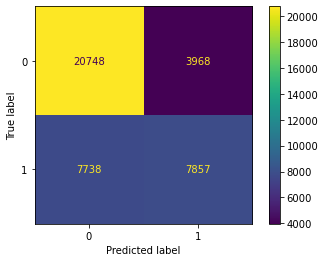

In [113]:
plot_confusion_matrix(logreg, X_train_i_sc, y_train);

### Model

In [114]:
logreg = LogisticRegression(random_state=33)

In [115]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'solver' : ['lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [100, 1000, 10000],    
}
clf = GridSearchCV(logreg, param_grid, cv=5)

In [116]:
clf.fit(X_train_i_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=33),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 1000, 10000],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']})

In [ ]:
print(clf.best_params_)

### Cross Validate

In [81]:
cv_results = cross_val_score(estimator=logreg, X=X_train_i_sc, y=y_train, cv=5, scoring='precision')
cv_results

array([0.65908115, 0.66203704, 0.68056146, 0.63996731, 0.67297762])

In [82]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78     24716
           1       0.66      0.50      0.57     15595

    accuracy                           0.71     40311
   macro avg       0.70      0.67      0.68     40311
weighted avg       0.70      0.71      0.70     40311



### Model 2 - default Logistic Regression, C=1

In [83]:
logreg = LogisticRegression(C=1, random_state=33)
logreg.fit(X_train_i_sc, y_train)

LogisticRegression(C=1, random_state=33)

In [84]:
cv_results = cross_val_score(estimator=logreg, X=X_train_i_sc, y=y_train, cv=5,
                            scoring='precision')
cv_results

array([0.65893471, 0.66203704, 0.68042553, 0.63982011, 0.67297762])

In [85]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78     24716
           1       0.66      0.50      0.57     15595

    accuracy                           0.71     40311
   macro avg       0.70      0.67      0.68     40311
weighted avg       0.70      0.71      0.70     40311



### Model 3 - default Logistic Regression, C=1e-1

In [86]:
logreg = LogisticRegression(C=1e-1, random_state=33)
logreg.fit(X_train_i_sc, y_train)

LogisticRegression(C=0.1, random_state=33)

In [87]:
cv_results = cross_val_score(estimator=logreg, X=X_train_i_sc, y=y_train, cv=5,
                            scoring='precision')
cv_results

array([0.65879828, 0.66273187, 0.67972743, 0.63882064, 0.67283685])

In [88]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78     24716
           1       0.66      0.50      0.57     15595

    accuracy                           0.71     40311
   macro avg       0.70      0.67      0.68     40311
weighted avg       0.70      0.71      0.70     40311



### Model 3 - Logistic Regression, C=1e-1, solver=saga

In [89]:
logreg = LogisticRegression(C=1e-1, random_state=33)
logreg.fit(X_train_i_sc, y_train)

LogisticRegression(C=0.1, random_state=33)

In [90]:
cv_results = cross_val_score(estimator=logreg, X=X_train_i_sc, y=y_train, cv=5,
                            scoring='precision')
cv_results

array([0.65879828, 0.66273187, 0.67972743, 0.63882064, 0.67283685])

In [103]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'solver' : ['lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [100, 1000, 10000],    
}
clf = GridSearchCV(logreg, param_grid, cv=5)

In [104]:
clf.fit(X_train_i_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=0.1, random_state=33),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 1000, 10000],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']})

In [105]:
print(clf.best_params_)

{'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
